# Unit 6 - Pythonic Monopoly

## San Francisco Housing Cost Analysis

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Homework 5/sfo_neighborhoods_census_data.csv")

In [4]:
# Read the CSV as a DataFrame
sfo_df = pd.read_csv(file_path, index_col="year")
sfo_df.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

## Housing Units Per Year

In [5]:
# Calculate the average sale price per square foot and average gross rent
Investment_per_year_df = sfo_df.groupby('year').mean()
Investment_per_year_df

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353         372560        1239
2011           341.903429         374507        1530
2012           399.389968         376454        2324
2013           483.600304         378401        2971
2014           556.277273         380348        3528
2015           632.540352         382295        3739
2016           697.643709         384242        4390

In [6]:
# Save the dataframe as a csv file
Investment_per_year_df.to_csv("../Homework 5/Investment_per_year.csv" , index=False)

In [7]:
# Slice for Average housing units
sfo_df = sfo_df["housing_units"]
sfo_df_avg = sfo_df.sort_values()
sfo_df_avg

year
2010    372560
2010    372560
2010    372560
2010    372560
2010    372560
         ...  
2016    384242
2016    384242
2016    384242
2016    384242
2016    384242
Name: housing_units, Length: 397, dtype: int64

In [8]:
# sfo_df.index

In [9]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_df_avg.hvplot.bar()

:Bars   [year]   (housing_units)

## Average Housing Costs in San Francisco Per Year

In [10]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_df_avg = sfo_df.groupby('year').mean()
sfo_df_avg

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [11]:
new_df = Investment_per_year_df.reset_index()

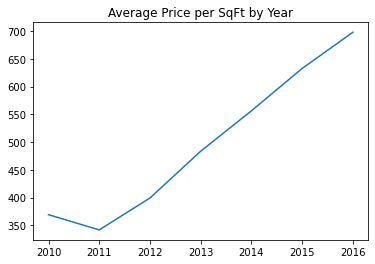

In [12]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot
x = new_df["year"]
y = new_df["sale_price_sqr_foot"]
plt.title("Average Price per SqFt by Year")
plt.plot(x, y)
plt.show()

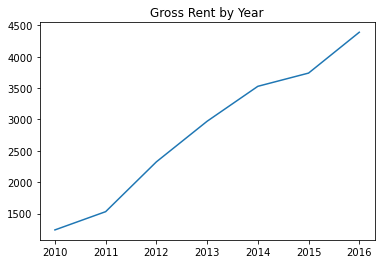

In [13]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot
x = new_df["year"]
y = new_df["gross_rent"]
plt.title("Gross Rent by Year")

plt.plot(x,y)
plt.show()

## Average Prices by Neighborhood

In [14]:
# Read the CSV into a Pandas DataFrame
suburb_df = pd.read_csv(file_path, index_col="year")
suburb_df

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195426         384242        4390

[397 rows x 4 columns]

In [15]:
# Group by year and neighborhood and then create a new dataframe of the mean values
suburb_df.groupby(['year','neighborhood']).mean()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [16]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
suburb_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [17]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
suburb_df.hvplot.line(xlabel="month", ylabel="rent")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

## The Top 10 Most Expensive Neighborhoods

In [18]:
# Getting the data from the top 10 expensive neighborhoods 
suburb_df = pd.read_csv(file_path, index_col="neighborhood")
expensive_suburb_df = suburb_df.sort_values("sale_price_sqr_foot", ascending=False)
expensive_suburb_df.head(10)

year  sale_price_sqr_foot  housing_units  \
neighborhood                                                          
Union Square District      2015          2258.702832         382295   
Presidio Heights           2016          1465.968586         384242   
Merced Heights             2016          1416.666667         384242   
Union Square District      2013          1290.472107         378401   
Miraloma Park              2014          1267.766203         380348   
Parnassus/Ashbury Heights  2016          1207.997485         384242   
Outer Richmond             2016          1196.645437         384242   
Marina                     2015          1132.837361         382295   
South of Market            2014          1119.838877         380348   
Corona Heights             2015          1100.791194         382295   

                           gross_rent  
neighborhood                           
Union Square District            3739  
Presidio Heights                 4390  
Merced Heights                   4390  
Union Square District            2971  
Miraloma Park                    3528  
Parnassus/Ashbury Heights        4390  
Outer Richmond                   4390  
Marina                           3739  
South of Market                  3528  
Corona Heights                   3739

<AxesSubplot:title={'center':'Top 10 expensive neighborhoods'}, xlabel='neighborhood'>

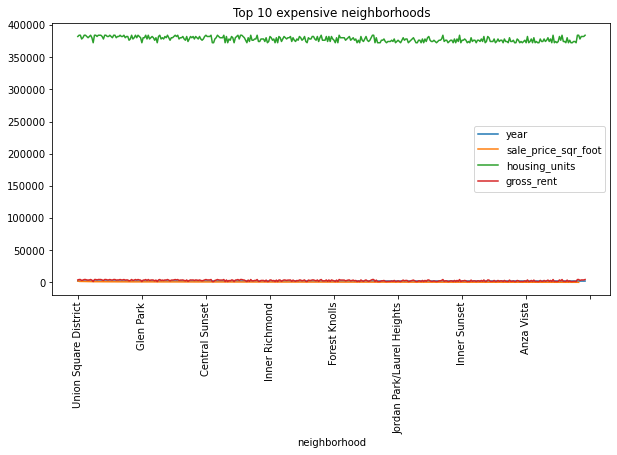

In [19]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_suburb_df.plot(figsize=(10,5), title="Top 10 expensive neighborhoods", rot=90)

## Comparing cost to purchase versus rental income

In [20]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
expensive_suburb_df.head()

print("Based on the above analysis of the top ten expensive neighborhood, the highest sale per square metre is $2258 as compare to rental amount $3739. It is cheaper to purchase than to rent.")

Based on the above analysis of the top ten expensive neighborhood, the highest sale per square metre is $2258 as compare to rental amount $3739. It is cheaper to purchase than to rent.


In [21]:
# Use the `drop` function to drop specific columns
expensive_suburb_df.drop(columns=['housing_units'], inplace=True)
expensive_suburb_df.head()

year  sale_price_sqr_foot  gross_rent
neighborhood                                                
Union Square District  2015          2258.702832        3739
Presidio Heights       2016          1465.968586        4390
Merced Heights         2016          1416.666667        4390
Union Square District  2013          1290.472107        2971
Miraloma Park          2014          1267.766203        3528

In [22]:
# Plot a hvplot bar chart of Top 10 Expensive Neighborhoods
expensive_suburb_df.hvplot.bar(title='Top 10 Expensive Neighborhoods in San Francisco')

:Bars   [neighborhood,Variable]   (value)

## Neighborhood Map

Load Location Data

In [23]:
# Load neighborhoods coordinates data
neighborhood_df = pd.read_csv("../Homework 5/neighborhoods_coordinates.csv")

Data Preparation

In [24]:
# Calculate the mean values for each neighborhood
neighborhood_df.mean()

Lat     37.760194
Lon   -122.439124
dtype: float64

In [25]:
# Join the average values with the neighborhood locations
# Prep Data
# Read in data
df1 = pd.read_csv(file_path).drop_duplicates()
df2 = pd.read_csv("../Homework 5/neighborhoods_coordinates.csv")

neighborhood_df = pd.concat([df1, df2], axis=1, join='inner')

neighborhood_df.tail()

year                   neighborhood  sale_price_sqr_foot  housing_units  \
68  2011                  Croker Amazon           145.853380         374507   
69  2011                Diamond Heights           382.352261         374507   
70  2011                      Downtown            234.281624         374507   
71  2011                Duboce Triangle           295.779378         374507   
72  2011  Eureka Valley/Dolores Heights           413.162804         374507   

    gross_rent        Neighborhood       Lat         Lon  
68        1530         West Portal  37.74026 -122.463880  
69        1530    Western Addition  37.79298 -122.435790  
70        1530  Westwood Highlands  37.73470 -122.456854  
71        1530       Westwood Park  37.73415 -122.457000  
72        1530         Yerba Buena  37.79298 -122.396360

In [26]:
# Merge the DataFrames
neighborhood_df = df1.merge(df2, left_on='neighborhood', right_on='Neighborhood')
neighborhood_df.head()

year  neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0  2010  Alamo Square           291.182945         372560        1239   
1  2011  Alamo Square           272.527310         374507        1530   
2  2012  Alamo Square           183.099317         376454        2324   
3  2013  Alamo Square           387.794144         378401        2971   
4  2014  Alamo Square           484.443552         380348        3528   

   Neighborhood        Lat       Lon  
0  Alamo Square  37.791012 -122.4021  
1  Alamo Square  37.791012 -122.4021  
2  Alamo Square  37.791012 -122.4021  
3  Alamo Square  37.791012 -122.4021  
4  Alamo Square  37.791012 -122.4021

In [27]:
# check Na
neighborhood_df.isna().sum()

year                   0
neighborhood           0
sale_price_sqr_foot    5
housing_units          0
gross_rent             0
Neighborhood           0
Lat                    0
Lon                    0
dtype: int64

In [28]:
# drop Na
neighborhood_df.dropna(inplace=True)
neighborhood_df

year       neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0    2010       Alamo Square           291.182945         372560        1239   
1    2011       Alamo Square           272.527310         374507        1530   
2    2012       Alamo Square           183.099317         376454        2324   
3    2013       Alamo Square           387.794144         378401        2971   
4    2014       Alamo Square           484.443552         380348        3528   
..    ...                ...                  ...            ...         ...   
368  2016  Visitacion Valley           328.319007         384242        4390   
369  2014     Silver Terrace           170.292549         380348        3528   
370  2014      Westwood Park           742.979723         380348        3528   
371  2016      Westwood Park           631.195426         384242        4390   
372  2015    Bayview Heights           590.792839         382295        3739   

          Neighborhood        Lat        Lon  
0         Alamo Square  37.791012 -122.40210  
1         Alamo Square  37.791012 -122.40210  
2         Alamo Square  37.791012 -122.40210  
3         Alamo Square  37.791012 -122.40210  
4         Alamo Square  37.791012 -122.40210  
..                 ...        ...        ...  
368  Visitacion Valley  37.728740 -122.41098  
369     Silver Terrace  37.734670 -122.40106  
370      Westwood Park  37.734150 -122.45700  
371      Westwood Park  37.734150 -122.45700  
372    Bayview Heights  37.728740 -122.41098  

[368 rows x 8 columns]

## Mapbox Visualization

In [29]:
# Set the mapbox access token
# YOUR CODE HERE!
load_dotenv()
map_box_api = os.getenv("mapbox")

In [30]:
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [31]:
# Read the CSV into a Pandas DataFrame
suburb_df = pd.read_csv(file_path)
suburb_df.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [32]:
# Prep Data
# Read in data
df1 = pd.read_csv(file_path).drop_duplicates()
df2 = pd.read_csv("../Homework 5/neighborhoods_coordinates.csv")

neighborhood_df = pd.concat([df1, df2], axis=1, join='inner')

neighborhood_df.tail()

year                   neighborhood  sale_price_sqr_foot  housing_units  \
68  2011                  Croker Amazon           145.853380         374507   
69  2011                Diamond Heights           382.352261         374507   
70  2011                      Downtown            234.281624         374507   
71  2011                Duboce Triangle           295.779378         374507   
72  2011  Eureka Valley/Dolores Heights           413.162804         374507   

    gross_rent        Neighborhood       Lat         Lon  
68        1530         West Portal  37.74026 -122.463880  
69        1530    Western Addition  37.79298 -122.435790  
70        1530  Westwood Highlands  37.73470 -122.456854  
71        1530       Westwood Park  37.73415 -122.457000  
72        1530         Yerba Buena  37.79298 -122.396360

In [33]:
# Merge the DataFrames
neighborhood_df = df1.merge(df2, left_on='neighborhood', right_on='Neighborhood')
neighborhood_df.head()

year  neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0  2010  Alamo Square           291.182945         372560        1239   
1  2011  Alamo Square           272.527310         374507        1530   
2  2012  Alamo Square           183.099317         376454        2324   
3  2013  Alamo Square           387.794144         378401        2971   
4  2014  Alamo Square           484.443552         380348        3528   

   Neighborhood        Lat       Lon  
0  Alamo Square  37.791012 -122.4021  
1  Alamo Square  37.791012 -122.4021  
2  Alamo Square  37.791012 -122.4021  
3  Alamo Square  37.791012 -122.4021  
4  Alamo Square  37.791012 -122.4021

In [34]:
# Prep Data
# Read in data
data_to_plot = neighborhood_df[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent", "Lat", "Lon"]]
df = neighborhood_df[neighborhood_df == "San Francisco"]

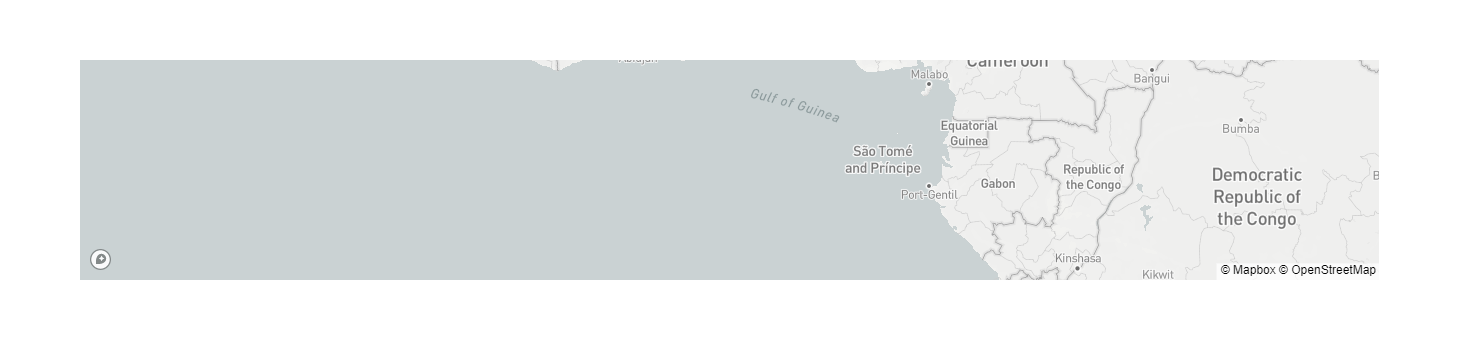

In [35]:
# Create a scatter mapbox to analyze neighborhood info
# Slice and plot data by name
map = px.scatter_mapbox(
    df,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    zoom=4
)
map.show()

## Cost Analysis - Optional Challenge

Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [36]:
# Fetch the data from all expensive neighborhoods per year.
df = neighborhood_df[neighborhood_df["neighborhood"].isin(neighborhood_df["neighborhood"])]
df.head()

year  neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0  2010  Alamo Square           291.182945         372560        1239   
1  2011  Alamo Square           272.527310         374507        1530   
2  2012  Alamo Square           183.099317         376454        2324   
3  2013  Alamo Square           387.794144         378401        2971   
4  2014  Alamo Square           484.443552         380348        3528   

   Neighborhood        Lat       Lon  
0  Alamo Square  37.791012 -122.4021  
1  Alamo Square  37.791012 -122.4021  
2  Alamo Square  37.791012 -122.4021  
3  Alamo Square  37.791012 -122.4021  
4  Alamo Square  37.791012 -122.4021

Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year

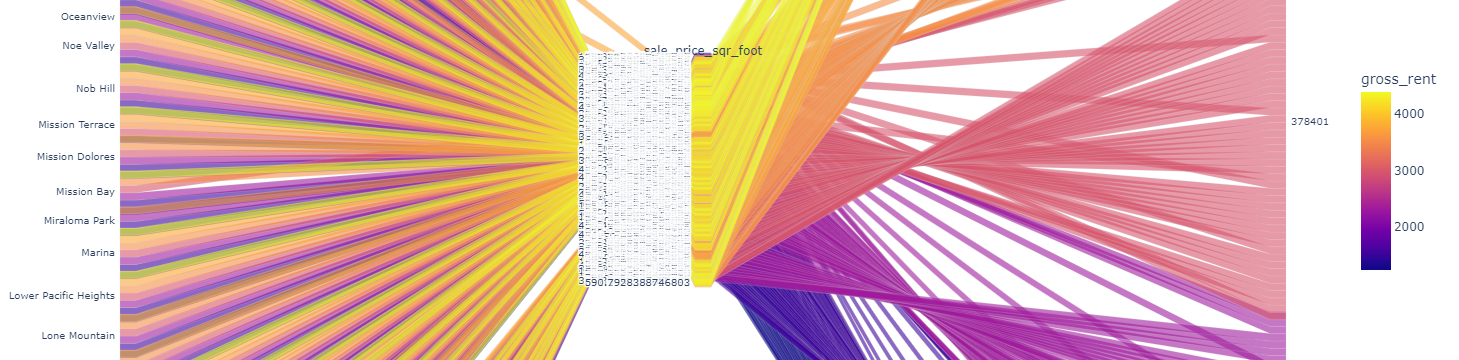

In [37]:
# Parallel Categories Plot
px.parallel_categories(
    neighborhood_df,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units"],
    color="gross_rent"
)

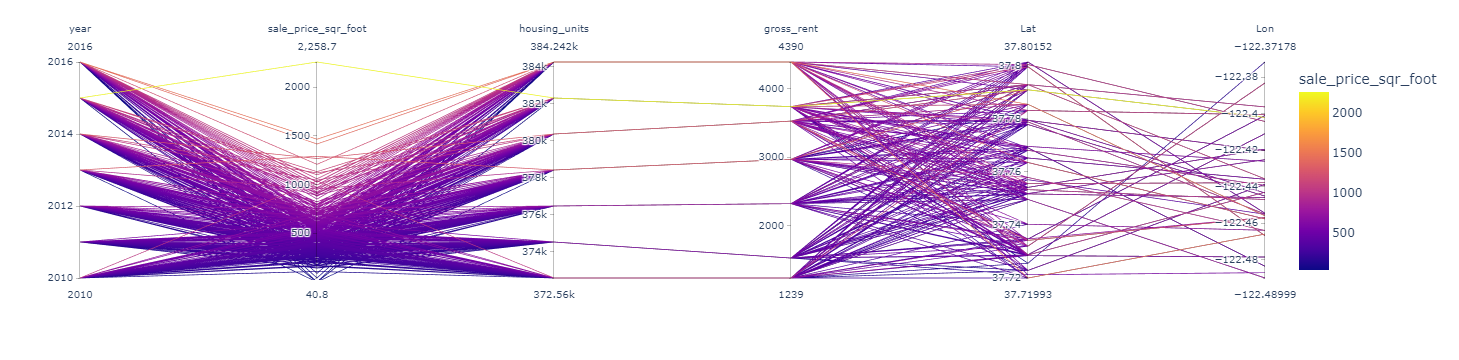

In [38]:
# Parallel Coordinates Plot
px.parallel_coordinates(neighborhood_df, color='sale_price_sqr_foot')

Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [39]:
# Sunburst Plot
neighborhood_df = px.data()
fig = px.sunburst(neighborhood_df, path=['neighborhood'])
fig.show()

TypeError: 'module' object is not callable